Dummy Variables & One-Hot Encoding

colors: red, blue, green

Nominal and Ordinal

Nominal - red, blue, green 
        - male, female

Ordinal - high, medium, low
          high > low, medium < high
        
        - undergraduate, masters, PhD

dummy variables - numerical values that rep the categorical variable. 0 and 1

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [11]:
dummies = pd.get_dummies(df.town) # getting dummies variables
dummies = dummies.replace({False:0,True:1}) # conversion

In [12]:
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [13]:
merged_df = pd.concat([df,dummies], axis='columns')

In [14]:
merged_df

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [16]:
merged_df = merged_df.drop(['town'],axis='columns')
merged_df

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


In [17]:
merged_df = merged_df.drop(['robinsville'],axis='columns')
merged_df

,area,price,monroe township,west windsor
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,1
6,2800,615000,0,1
7,3300,650000,0,1
8,3600,710000,0,1
9,2600,575000,0,0


monroe township = [monroe township: 1, west windor: 0 ]
west windsor = [monroe township: 0, west windor: 1 ]
robinsville = [monroe township: 0, west windor: 0 ]

dummy variable trap - overfitting 
5 dummy variable - 4 dummy variables

In [22]:
robinsville_df = merged_df[merged_df['monroe township'] == 0]
robinsville_df = robinsville_df[robinsville_df['west windsor'] == 0]
robinsville_df

,area,price,monroe township,west windsor
9,2600,575000,0,0
10,2900,600000,0,0
11,3100,620000,0,0
12,3600,695000,0,0


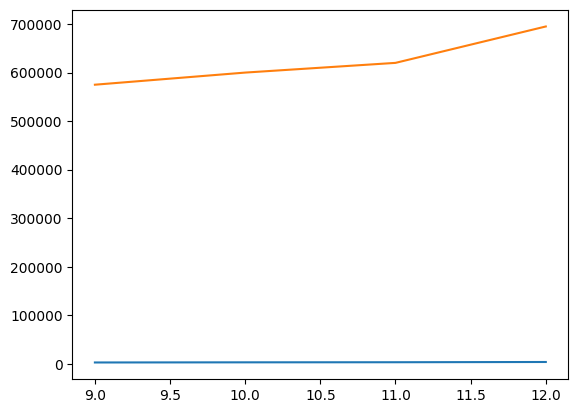

In [24]:
# line graph
plt.plot(robinsville_df['area'])
plt.plot(robinsville_df['price'])

# ONE-HOT ENCODING

In [42]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [27]:
## Step 1: label encoder
le = LabelEncoder()
df2 = df
df2.town = le.fit_transform(df2.town) 
df2

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [28]:
X = df2[['town','area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [29]:
y = df2.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [43]:
ohe = OneHotEncoder()
ct = ColumnTransformer(transformers=[('encoder',ohe,[0])],remainder='passthrough')

In [48]:
X1 = ct.fit_transform(X)

In [49]:
X1

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [50]:
X1 = X1[:,1:] # dropped the first column
X1

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

## Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [52]:
model.fit(X1,y)

LinearRegression()

In [53]:
model.predict([[0,0,3600]])

array([666607.18125134])

In [54]:
model.score(X1,y) # checking for accuracy

0.9573929037221873